In [1]:
%config InlineBackend.figure_format = 'retina'

# Simulation of the L63 dynamical system

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pathlib
import shelve

import L63

We generate a random trajectory of the L63 dynamical system (or load a pregenerated trajectory). The trajectory has a length of $T = 100$ at time-intervals $ΔT = 0.01$.

The trajectory is saved in the file `data/L63-attractor.*`.

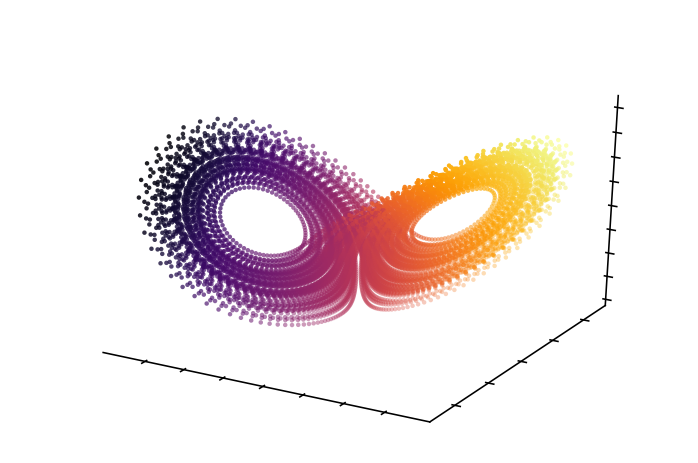

In [3]:
if not pathlib.Path('data/L63-attractor.dat').is_file():

    T = 100
    ΔT = 0.01
    X__ = L63.rnd_trajectory(N=1, T=T, ΔT=ΔT, T0=4)
    X__ = np.transpose(X__, (1,0,2))[0,:]

    WS = shelve.open('data/L63-attractor')
    try:
        WS['T'] = T
        del T
        WS['ΔT'] = ΔT
        del ΔT
        WS['X__'] = X__
        del X__
    finally:
        WS.close()



WS = shelve.open('data/L63-attractor', flag='r')
try:
    T = WS['T']
    ΔT = WS['ΔT']
    X__ = WS['X__']
finally:
    WS.close()
    del WS

L63.scatter_plot(X__, h=(lambda x: x[0]), X0=X__, colormap='inferno')

Taking the points of this trajectory, we can evolve them according to the flow of the L63 dynamical system. The chaotic nature of this system manifests itself that the trajectories of initially nearby points diverge as time passes.

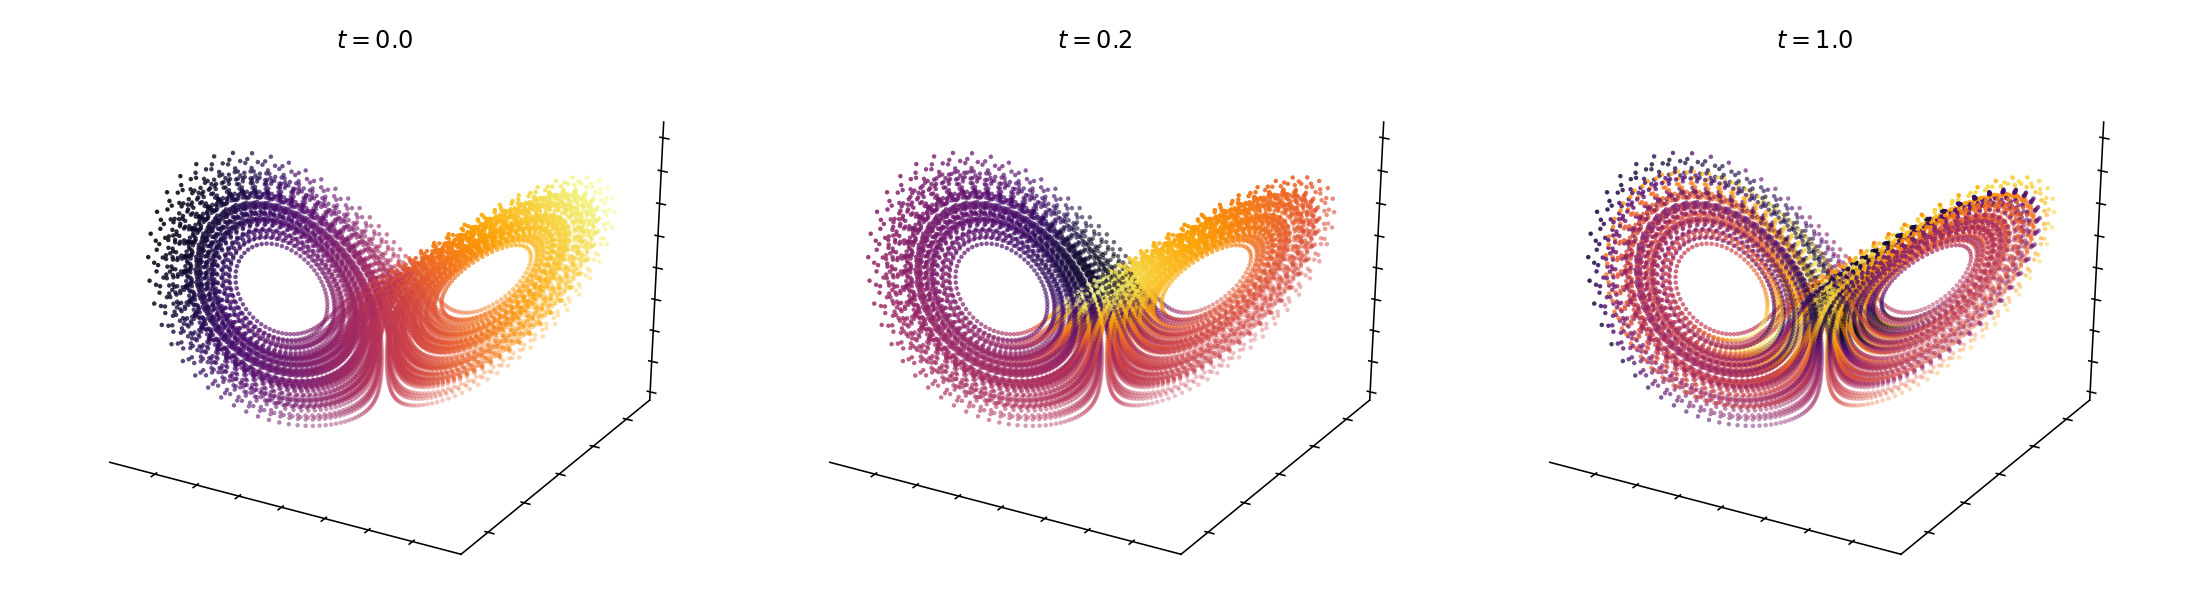

In [4]:
ΔT = 0.1
X = L63.trajectory(X__, 1, ΔT)


iT_ = np.round(np.array([0,0.2,1.0])/ΔT).astype(int)


fig, ax = plt.subplots(1, len(iT_), subplot_kw={'projection': '3d'}, figsize=(len(iT_)*5,4), dpi=72)

h = lambda x: x[0]
for i, iT in enumerate(iT_):
    L63.scatter_plot(X[iT,:], h=h, ax=ax[i], X0=X[0,:], colormap='inferno')

    ax[i].set_title('$t = ' + str(ΔT * iT) + '$')


plt.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)
plt.show()
